<font size=4 color='blue'>
    
# <center>Clase 8. Noviembre 18 del 2020 </center>

<font size=5 color='blue'>
Classification Predictive Modeling

<font size=4>
Classification predictive modeling is the task of approximating a mapping function F from input variables (X) to <font color='red' > $\bf discrete$ <font color='black' > target variables (y). In statistics a variable that can take on one of a limited number of possible values is called a $\bf categorical$ $\bf variable$.

<font size=5 color='blue'>
Regression Predictive Modeling

<font size=4 color='black'>
    
Regression predictive modeling is the task of approximating a mapping function F from input variables (X) to a <font color='red' > $\bf continuos$ <font color='black' > target variable (y).

<font size=5 color='blue'>
Classification

<font size=4 color='black'>
    
A classification problem requires that samples be classified into one of two or more classes.

A classification can have real-valued or discrete input variables.

A problem with two classes is often called a two-class or binary classification problem.

A problem with more than two classes is often called a multi-class classification problem.

A problem where a sample is assigned multiple classes is called a multi-label classification problem.
    


<font size=5 color='blue'>
Handwritten Digits Classification using MNIST database

<font size=4 color='black'>

[Hand written Zip code recognition](./clase8/Back-propag-hand-written-cnn-lecun-1989.pdf)


<img src='mnist.png'>

<font size=4 color='black'>
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

In [ ]:
import numpy as np
import keras

from keras import layers
from keras.layers import Input, Dense, Activation, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import SGD
import keras.backend as K

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import pickle
import gzip


np.random.seed(1)

%matplotlib inline

<font size=5 color='blue'>
Data preparation



 <font size=4 color='black'>   
The database mnist can be downloaded from the following URL: 
    
[MNIST data download](https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz)

<font size=4 color='black'>
The data to train and test the neuronal network are in the file 'mnist.pkl.gz'.

    gzip.open('filename', mode='rb') open the compressed binary file 'filename'.
    
   The documentation of gzip.open can be found at [gzip.open(...)](https://docs.python.org/3/library/gzip.html#gzip.open)

    pickle.load('file', encoding = 'latin1') decode the file 'file' in latin1

Documentation: [pickle.load(...)](https://docs.python.org/3/library/pickle.html#pickle.load)

The function 'load_data()' has three data sets as output: 

    train_data  # Data for training
    val_data    # Data for validation
    test_data   # Data for testing

In [ ]:
# The database is in the working directory: mnist.pkl.gz file.
    
def load_data():

    f = gzip.open('mnist.pkl.gz', 'rb')
    
    train_data, val_data, test_data = pickle.load(f, encoding="latin1")
    
    f.close()
    
    return (train_data, val_data, test_data)

In [ ]:
# the data are loaded in three sets: train_data, val_data and test_data 

train_data, val_data, test_data = load_data()

<font size=4 color='black'>
    
Each of these sets is a tuple with two entries:

In [ ]:
print("The type of train_data: ", type(train_data), "with length: ", len(train_data) )
print("The type of val_data: ", type(val_data), "with length: ", len(val_data) )
print("The type of test_data: ", type(test_data), "with length: ", len(test_data) )

In [ ]:
print("Shape of the first element of the train_data tuple: ", train_data[0].shape)
print("Shape of the second element of the train_data tuple: ", train_data[1].shape)
print("Shape of the first element of the val_data tuple: ", val_data[0].shape)
print("Shape of the second element of the val_data tuple: ", val_data[1].shape)
print("Shape of the first element of the test_data tuple: ", test_data[0].shape)
print("Shape of the second element of the test_data tuple: ", test_data[1].shape)

<font size=5 color="blue">

Analyzing the data extracted from MNIST

<font size=4 color='black'>
The first entry corresponds to the network inputs (the features of the images) and the second entry corresponds to the targets (the corresponding digits associated to the images). It is to note that pixel values were rescaled to values between 0.0 and 1.0

In [ ]:
print("features 150 to 199 of the first training sample \n \n", train_data[0][0][150:200])
print("\n y value of the first training sample =",train_data[1][0])

<font size=5 color="blue">
    
Viewing one sample from the data sets

<font size=4 color='black'>
    
The digits in the MNIST dataset are images of 28x28 pixels. 
    
In the recovered datasets, images were represented by vectors of dimension 28x28=784. 
    
To deploy the digit image of a sample (index), its vector representation is changed to a matrix with dimensions 28x28.
    
    
This is done by using the following function:
    
    plt.imshow(sets[0][index].reshape((28, 28)),cmap='gray')      #Images are in shades of gray

Documentation: [matplotlib.pyplot.imshow(...)](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow)



In [ ]:
index = 1567

plt.imshow(train_data[0][index].reshape((28, 28)),cmap='gray')

print(train_data[1][index], "is the digit corresponding to the sample", index)
print("\n This is its image")

<font size=5 color='blue'>

Separation of the data into features (inputs) and targets:

In [ ]:
x_train = train_data[0]   # input (features) in the training data set
y_train = train_data[1]   # target (the digit) in the training data set

x_val = val_data[0]   # input (features) in the validation data set
y_val = val_data[1]   # target (the digit) in the validation data set

x_test = test_data[0]     # input (features) in the testing data set
y_test = test_data[1]     # target (the digit) in the testing data set


In [ ]:
print(type(x_train))
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
y_train

<font size=5 color='blue'>
One-hot encoding of target variable y

<font size=4>
    
The target value can have one of ten elements (classes), the digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9). 



The train_y and test_y sets are arrangements in which each entry contains a digit. Each digit is represented as a integer of 64 bits.
    
    
We change this representation to a vectorial one following One-hot encoding 
[One-hot encoding](https://en.wikipedia.org/wiki/One-hot).
    
    
In the One-Hot encoding, a digit is represented with a vector having dimension 10 (because we have 10 classes) with 1.0 in the vector index corresponding to the digit and 0.0 elsewhere in the vector. 


<font size=5 color='blue' >
    
Digit |     One-hot representation 
--- | --- 
 0  | [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 1  | [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 2  | [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 3  | [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 4  | [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 5  | [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 6  | [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 7  | [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 8  | [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 9  | [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

<font size=5 color='purple'>
Demo using numpy.eye

In [ ]:
np.eye(10)

In [ ]:
np.eye(10)[0]

In [ ]:
np.eye(10)[1]

In [ ]:
y_train[0:5]

np.eye(10)[train_y[0:5].reshape(-1)]

In [ ]:
np.eye(10)[y_train[0:5]]

<font size=5 color='purple'>
End of demo using numpy.eye

In [ ]:
train_y = np.eye(10)[y_train]

val_y = np.eye(10)[y_val]

test_y = np.eye(10)[y_test]

In [ ]:
print("Y: Digit representation for the first training sample \n", y_train[0])
print("Y: One-hot representation for the first training sample \n",train_y[0])

<font size=4 color="black">
    
For convenience, the dimensions of the input sets will be changed to the format:

(number of samples, image width, image length).

In [ ]:
train_x = x_train.reshape(50000, 28, 28)
val_x  = x_val.reshape(10000, 28, 28)
test_x = x_test.reshape(10000, 28, 28)

<font size=4 color="black">
    
In summary, the following dimensions are used for the training and the test sets:

In [ ]:
print ("number of training examples = " + str(train_x.shape[0]))
print ("number of validation examples = " + str(val_x.shape[0]))
print ("number of test examples = " + str(test_x.shape[0]))

print ("train_x shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_y.shape))

print ("val_x shape: " + str(val_x.shape))
print ("val_y shape: " + str(val_y.shape))

print ("test_x shape: " + str(test_x.shape))
print ("test_y shape: " + str(test_y.shape))

<font size=5 color="blue">

Constructing the Learning System

<font size=5 color="black">

Displaying the architecture of the desired neural network

In [ ]:
import networkx as nx

class Network(object):
    
    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """        
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample
    
    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()    
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))
        nx.draw(Q, pos = ps)
                

In [ ]:
# Architecture of the neural network we want to implement in the present notebook

layers = [784,20,10]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>

Definition of the neural network architecture
  

<font size=5 color='black'> 
    
Keras has two different modes to define the architecture:

<font size=4 color='black'> 
    
1.- The sequential model. It is a sequential stack of layers.
    
2.- The functional API. It is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.  

In the present case, we will use this last mode for constructing the architecture of the network.
    

Documentation: [Keras Functional API](https://keras.io/getting-started/functional-api-guide/)

In [ ]:
def architecture(input_shape, num_clases):Loop
    
    # Defining the input as a tensor with shape input_shape. 
    inputs = Input(input_shape, name='input-layer')
    
    # Flattening the input tensor of dimensions (28,28,1) to a tensor of dimensions (784, 1)
    x = Flatten()(inputs)
    
    # Defining the first hidden layer with 20 nodes and sigmoid as activation function
    x = Dense(20, kernel_initializer='uniform', bias_initializer='zeros', name='hidden-layer')(x)
    x = Activation('sigmoid')(x)
    
    # Defining the first hidden layer with num_clases nodes and softmax as activation funcion, which is
    x = Dense(num_clases, kernel_initializer='uniform', bias_initializer='zeros')(x)
    
    # For the output layer we use the activation function 'softmax'
    outputs = Activation('softmax', name='output.layer')(x)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.    
    arch_model = Model(inputs = inputs, outputs = outputs, name='MnistModel')

    return arch_model

<font size=4 color='black'> 

    
   *The softmax activation function is always used for classification when the number (K) of classes is larger than two.* 

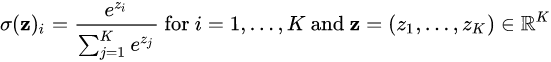
    
    
    
It is used to compute probability distribution from a vector of real numbers. 

The Softmax function produces an output which is a range of values between 0 and 1, with the sum of the probabilities been equal to 1. 


The Softmax function is used in multi-class models where it returns probabilities of each class, with the target class having
the highest probability.


[Activation functions](./clase8/activation_functions_2018.pdf)


<font size=5 color="blue">

Constructing the neural network model for the Learning System

In [ ]:
one_image = (28,28)
num_classes= 10

# Generating a model using the architecture defined for the neural network
mnist_model = architecture(one_image, num_classes)

<font size=5 color="blue">
    
Model plot and summary

<font size=4 color='black'> 
The function 'plot_model()' generates a graphic with the layers and their number of input ands output weights.
$$ $$
Documentation: [Model visualization](https://keras.io/visualization/#training-history-visualization)

In [ ]:
plot_model(mnist_model, to_file='FF_mnist_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
mnist_model.summary()

<font size=5 color='blue'>
Optimization method

<font size=4 color="black">
This requires defining the optimization algorithm, the loss function and the metric.
    
In the present case we are using the algorithm of Stochastic Gradient descent with learning rate "lr", "momentum" without Nesterov acceleration".


[An overview of gradient descent optimization algorithms](./clase8/SGD_overview_2016-17.pdf)

This publication also comments some other optimization variants of this algorithm; Adagrad, Adadelta, RMStrop and Adam.

<font size=5 color='blue'>
Optimizer

In [ ]:
learning_rate = 0.01

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)

<font size=5 color='blue'>
The cost (loss) and Metric functions

<font size=4 color="black">
    
The cost function *J* is the one defined as "categorical_crossentropy"
    
$$ J = \frac{1}{m} \sum_{i=1}^m \sum_{k=0}^{K-1}(y_k^{(i)}*\log{(F_k(x^{(i)})))}$$
    
 where $F_k(x^{(i)})$ is the predicted value and $y_k^{(i)}$ is the target value for the sample *i*; *K* is the number of classes and *m* is the number of samples.
    
[Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy)

Any loss consisting of a negative log-likelihood is a cross entropy between the empirical distribution defined by the training set and the model. For example, mean squared error is the cross-entropy between the empirical distribution and a Gaussian model.

        Ian Goodfellow, Yoshua Bengio and Aaron Courville, Deep Learning, pp 132

    
[Categorical cross entropy](https://www.deeplearningbook.org/)

You can find more information about cross entropy in 


     Aston Zhang, Zachary C. Lipton, Mu Li, and Alexander J. Smola. Dive into Deep Learning. pp 913
    

A metric function is similar to a loss function, except that the results from evaluating a metric are not used when training the model. You may use any of the loss functions as a metric function. In the present example, we are using "accuracy" as metrics:
    
*Accuracy = Number of correct predictions / Total number of predictions made*
    

Categorical crossentropy will compare the distribution of the predictions (the activations in the output layer, one for each class) with the true distribution, where the probability of the true class is set to 1, and 0 for the other classes.

To put it in a different way, the true class is represented as an encoded vector, and the closer the model’s outputs are to that vector, the lower the loss.
    
Documentation:

[keras.compile(...)](https://keras.io/models/model/#compile)


[Keras losses](https://keras.io/api/losses/)

In [ ]:
loss_function = 'categorical_crossentropy'
metric_function = 'accuracy'

<font size=5 color='blue'>
Compiling the model

In [ ]:
mnist_model.compile(optimizer = optimizer, loss = loss_function, metrics = [metric_function])

<font size=5 color='blue'>
    
Training the learning system

<font size=4 color="black">
    
Documentation: [keras.fit(...)](https://keras.io/models/model/#fit)


In [ ]:
num_epochs = 100

history = mnist_model.fit(x = train_x, y = train_y, epochs=num_epochs, batch_size = 100, \
                          validation_data=(val_x,val_y), shuffle=False, verbose=2)

<font size=4 color='black'>

* Note: if you run `fit()` again, the `model` will continue training, starting with the parameters it has already learnt, instead of reinitializing them.


<font size=5 color="blue">

Plotting the cost function of training and validation data sets as a function of the epoch

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cost function')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

<font size=5 color="blue">
Plotting the accuracy function of training and validation sets as a function of the epoch

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

<font size = 5 color='blue'>

Loss and accuracy evaluation

<font size= 4 color='black'>    
After training the network, the loss and accuracy functions are evaluated using the test samples (test_x, test_y). This is done using the Keras Method evaluate(x=None, y=None, ...).
    

    
[Method evaluate in Keras](https://keras.io/models/model/)

In [ ]:
# Evaluation using all the samples of the test set
evaluations = mnist_model.evaluate(x = test_x, y = test_y)

print ("Loss = " + str(evaluations[0]))
print ("Test Accuracy = " + str(evaluations[1]))


In [ ]:
# Evaluation using the first 100 samples of the test set

evaluations = mnist_model.evaluate(x = test_x[:100], y = test_y[:100])

print ("Loss = " + str(evaluations[0]))
print ("Test Accuracy = " + str(evaluations[1]))


<font size = 5 color='blue'>
Digits prediction

<font size= 4 color='black'>    
The trained network can be used to generate predictions of the digists associated to new samples. For example, those in the test data (test_x, test_y). This is done using the Keras Method "predict(x, ...)"
      
[Method predict in Keras](https://keras.io/models/model/)

In [ ]:
# Predicting the digits associated to each sample in the test set (test_x)
predictions = mnist_model.predict(test_x)

In [ ]:
sample = 2345

# Predicting the digit associated to the sample 
# np.argmax returns the index of the maximum value

prediction = np.argmax(predictions[sample])

print('For the sample number', sample, 'the prediction is the digit:', prediction)

<font size=4 color="black"> 
Displaying the digit associated (not predicted!) to this sample.

In [ ]:
plt.imshow(test_data[0][sample].reshape((28, 28)), cmap='gray')

print ('For the sample number', sample, 'the associated digit is:', np.squeeze(test_data[1][sample]))